### Importamos la libreria.

In [425]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Importamos el conjunto de datos y miramos los primeros 5 registros.

In [412]:
cars = pd.read_csv('/content/Automobile_data.csv')
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


Ahora guardamos los valores que se han encontrado anteriormente como valores nulos.

In [413]:
valores_nulos = ['?']
cars = pd.read_csv('/content/Automobile_data.csv', na_values=valores_nulos)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


Contamos los valores nulos de nuestro conjunto de datos.

In [414]:
cars.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Ahora vemos de forma gráfica.

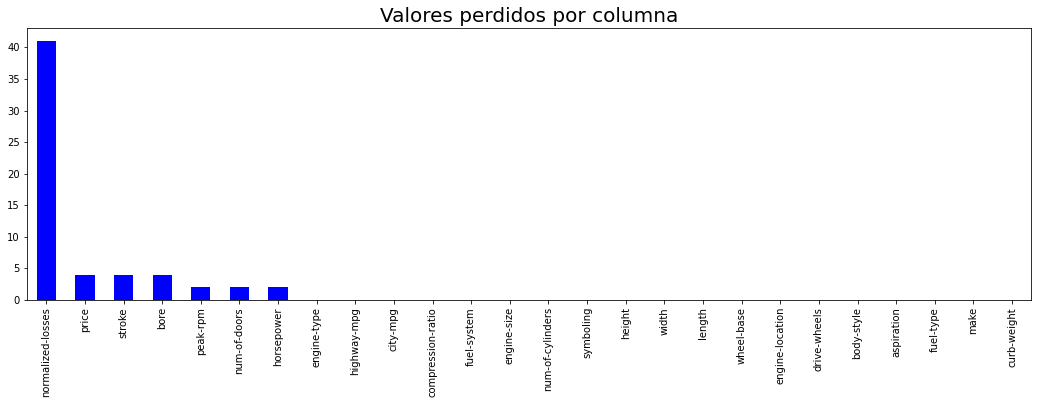

In [415]:
plt.subplots(0,0, figsize = (18,5))
ax = (cars.isnull().sum()).sort_values(ascending = False).plot.bar(color = 'blue')
plt.title('Valores perdidos por columna', fontsize = 20);

Ahora intentamos incorporar los valores perdidos con un metodo llamado "interpolate".

In [416]:
cars['normalized-losses'] = cars['normalized-losses'].interpolate(method="linear", limit_direction="both")
cars['price'] = cars['price'].interpolate(method="linear", limit_direction="both")
cars['stroke'] = cars['stroke'].interpolate(method="linear", limit_direction="both")
cars['bore'] = cars['bore'].interpolate(method="linear", limit_direction="both")
cars['peak-rpm'] = cars['peak-rpm'].interpolate(method="linear", limit_direction="both")
cars['horsepower'] = cars['horsepower'].interpolate(method="linear", limit_direction="both")
cars['num-of-doors'] = cars['num-of-doors'].fillna('four')

Ahora nos aseguramos de que el conjunto de datos no tenga valores nulos.

In [417]:
cars.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

De todas formas nos aseguramos.

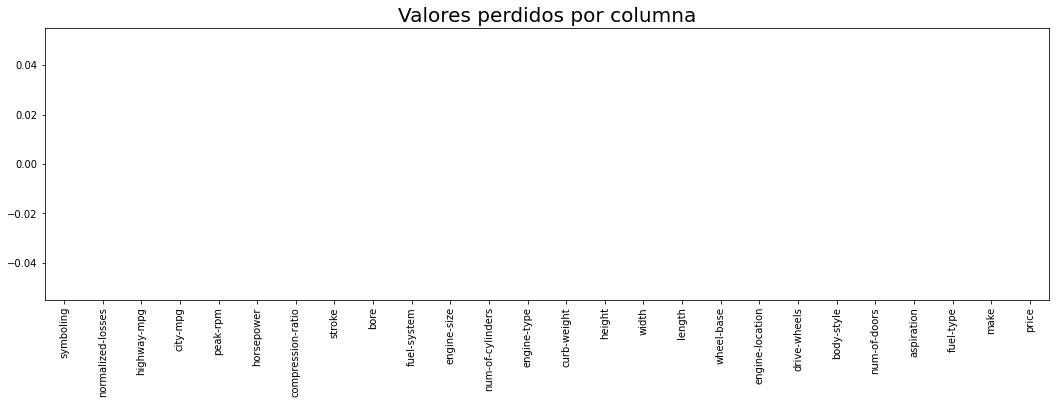

In [418]:
plt.subplots(0,0, figsize = (18,5))
ax = (cars.isnull().sum()).sort_values(ascending = False).plot.bar(color = 'blue')
plt.title('Valores perdidos por columna', fontsize = 20);

Observemos los tipos de datos que existen en el conjunto de datos.

In [419]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,164.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,164.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


Podemos ver que no todos los datos son continuos así que tendremos que solucionar este problema de la siguiente manera.

In [420]:
leMake = preprocessing.LabelEncoder()
leMake.fit(cars["make"])
cars["make"] = leMake.transform(cars["make"])+1
leFT = preprocessing.LabelEncoder()
leFT.fit(cars["fuel-type"])
cars["fuel-type"] = leFT.transform(cars["fuel-type"])+1
leA = preprocessing.LabelEncoder()
leA.fit(cars["aspiration"])
cars["aspiration"] = leA.transform(cars["aspiration"])+1
leNOD = preprocessing.LabelEncoder()
leNOD.fit(cars["num-of-doors"])
cars["num-of-doors"] = leNOD.transform(cars["num-of-doors"])+1
leBS = preprocessing.LabelEncoder()
leBS.fit(cars["body-style"])
cars["body-style"] = leBS.transform(cars["body-style"])+1
leDW = preprocessing.LabelEncoder()
leDW.fit(cars["drive-wheels"])
cars["drive-wheels"] = leDW.transform(cars["drive-wheels"])+1
leEL = preprocessing.LabelEncoder()
leEL.fit(cars["engine-location"])
cars["engine-location"] = leEL.transform(cars["engine-location"])+1
leET = preprocessing.LabelEncoder()
leET.fit(cars["engine-type"])
cars["engine-type"] = leET.transform(cars["engine-type"])+1
leNC = preprocessing.LabelEncoder()
leNC.fit(cars["num-of-cylinders"])
cars["num-of-cylinders"] = leNC.transform(cars["num-of-cylinders"])+1
leFS = preprocessing.LabelEncoder()
leFS.fit(cars["fuel-system"])
cars["fuel-system"] = leFS.transform(cars["fuel-system"])+1



Dividimos nuestros conjuntos de datos en las caracteristicas y la variable a predecir.

In [421]:
x = cars.drop('price', axis=1)
y = cars['price']

Ahora dividimos el conjunto de datos en el conjunto de entrenamiento y el conjunto de prueba.

In [422]:
x_train, x_test, y_train, y_test = train_test_split(np.array(x), np.array(y), test_size=0.7, random_state=209)

Entrenamos el conjunto de datos con el modelo de regresión lineal.

In [429]:
regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

Observamos el score.

In [430]:
regression.score(x_test, y_test)

0.8577789918774089

In [431]:
DTregression = DecisionTreeRegressor()
DTregression.fit(x_train, y_train)

DecisionTreeRegressor()

In [432]:
DTregression.score(x_test, y_test)

0.8028089324967764